# Data Mining

*Second Assignment*

First thing you should do is using your previous assignment
preprocessed dataset.

After loading your preprocessed dataset, you should do each task in list
below separately.

In [62]:
import numpy as np
import datetime as DT
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn_extra.cluster import KMedoids
from sklearn.mixture import GaussianMixture
%matplotlib inline

In [29]:
# loading your preprocessed dataset
df = pd.read_csv('marketing_campaign.csv')
print(df[0:2]) 
if df.isna().sum().sum() != 0 :
    print("Lack of integrity")
	
df.isna().sum() 

df.drop('ID', inplace=True, axis=1)
print(df)

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   

  Dt_Customer  Recency  MntWines  ...  NumCatalogPurchases  NumStorePurchases  \
0  04-09-2012       58       635  ...                   10                  4   
1  08-03-2014       38        11  ...                    1                  2   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  7             0             0             0             0   
1                  5             0             0             0             0   

   AcceptedCmp2  Complain  Response  
0             0         0         1  
1             0         0         0  

[2 rows x 27 columns]
Lack of integrity
      Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0           1957  Graduation         Single  58138

In [30]:
# Drop columns Year_Birth 
df.drop('Year_Birth', inplace=True, axis=1)
# Drop columns Dt_Customer
df.drop('Dt_Customer', inplace=True, axis=1)
# Drop columns Response
df.drop('Response', inplace=True, axis=1)
# Drop columns Complain
df.drop('Complain', inplace=True, axis=1)
# Drop columns AcceptedCmp1
df.drop('AcceptedCmp1', inplace=True, axis=1)
# Drop columns AcceptedCmp2
df.drop('AcceptedCmp2', inplace=True, axis=1)
# Drop columns AcceptedCmp3
df.drop('AcceptedCmp3', inplace=True, axis=1)
# Drop columns AcceptedCmp4
df.drop('AcceptedCmp4', inplace=True, axis=1)
# Drop columns AcceptedCmp5
df.drop('AcceptedCmp5', inplace=True, axis=1)
# Drop columns Marital_Status
df.drop('Marital_Status', inplace=True, axis=1)
# Drop columns Education
df.drop('Education', inplace=True, axis=1)
# Drop columns Kidhome
df.drop('Kidhome', inplace=True, axis=1)
# Drop columns Teenhome
df.drop('Teenhome', inplace=True, axis=1)
# Drop columns Income
df.drop('Income', inplace=True, axis=1)


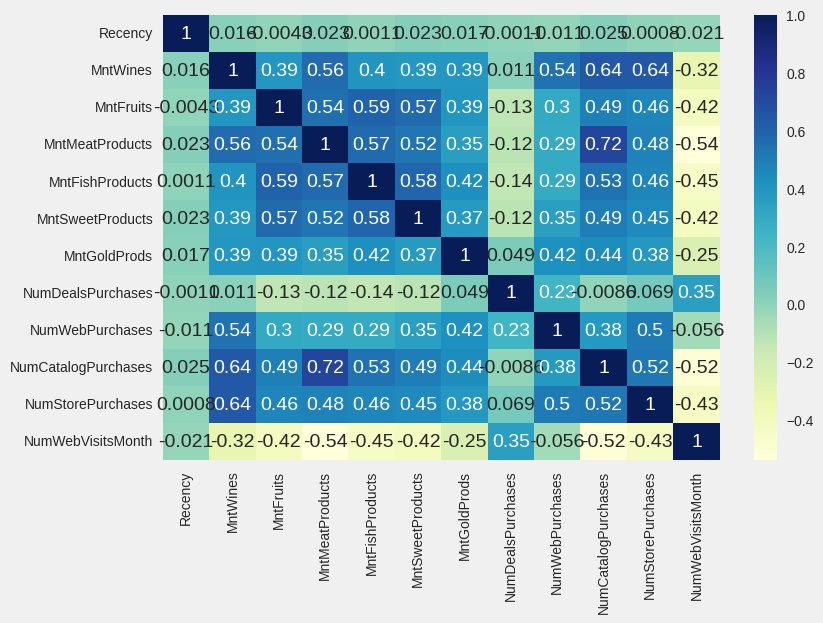

In [31]:
# Plot heat-map of data correlation 
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [32]:
# Scale data using standard scaler
object = StandardScaler()
object.fit_transform(df)

array([[ 0.30703926,  0.98378127,  1.55157698, ...,  2.51089024,
        -0.55078479,  0.69390374],
       [-0.38366418, -0.87047948, -0.63630116, ..., -0.56871962,
        -1.1661254 , -0.13046347],
       [-0.79808624,  0.36272278,  0.57080402, ..., -0.22654075,
         1.29523705, -0.54264708],
       ...,
       [ 1.44669994,  1.79502034,  0.545656  , ...,  0.11563813,
         2.21824797,  0.28172013],
       [-1.41971934,  0.36866592,  0.09299156, ...,  0.79999587,
         1.29523705, -0.95483068],
       [-0.31459383, -0.65355475, -0.58600511, ..., -0.56871962,
        -0.55078479,  0.69390374]])

In [7]:
# Fit T-SNE model with 2 components and 35 as perplexity and random_state=1
embedded = TSNE(n_components=2, learning_rate='auto',random_state=1, perplexity=3).fit_transform(df)          
embedded.shape

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


(2240, 2)

In [8]:
# Apply PCA with random state=1
pca = PCA(2)
X, Y = make_blobs(n_samples=2000, n_features=12, centers=8, random_state=1)
data = pca.fit_transform(X)

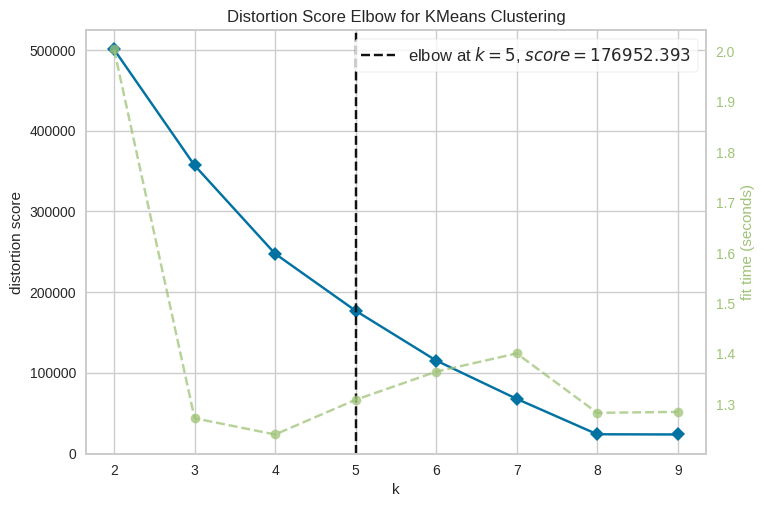

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [9]:
"""
Apply K-means clustering method with 2,3,4,…,9 clusters and add its’
distortions to a list and then use elbow method to decide which cluster
size is optimum
""" 
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [33]:
# Calculate and print silhouette score for 3, 4, 5, 6 clusters
for i in range(3,7):
    km = KMeans(n_clusters=i, random_state=42)
    km.fit_predict(X)
    score = silhouette_score(X, km.labels_, metric='euclidean')
    print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.416
Silhouetter Score: 0.512
Silhouetter Score: 0.570
Silhouetter Score: 0.642


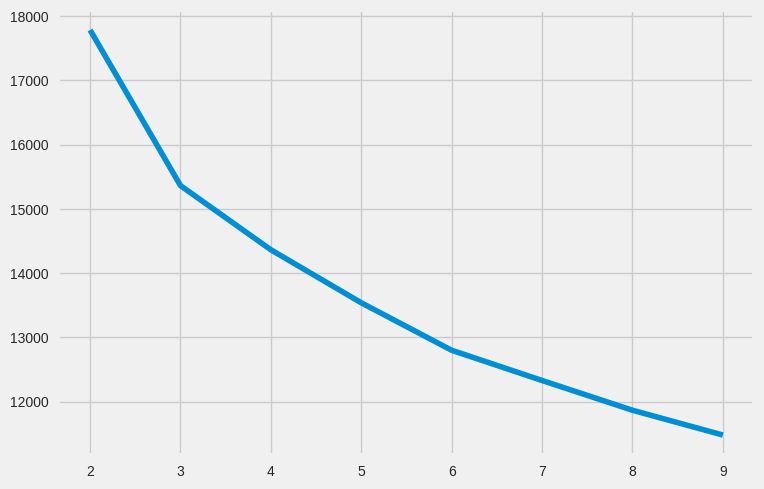

In [45]:
sse = []
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.to_numpy())
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, random_state=1)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)
sns.lineplot(x = np.linspace(2, 9, 8), y = sse);    

<AxesSubplot:xlabel='0', ylabel='1'>

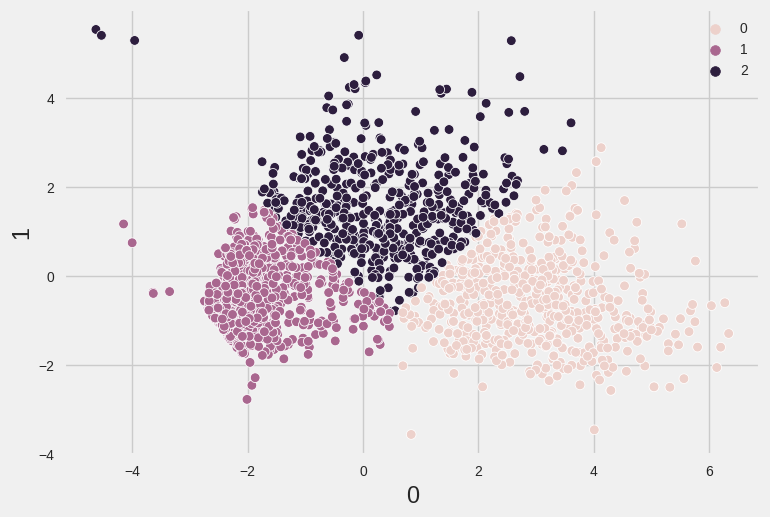

In [46]:
# Apply K-means on PCA data with cluster_size=3 and plot a figure which visualize data segmentation
pca_data = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(pca_data)
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(pca_data)
sns.scatterplot(x=pca_df.iloc[:,0], y=pca_df.iloc[:,1], hue=kmeans.labels_)

In [47]:
# Use describe function to describe number of each cluster in your clustering method
df['cluster'] = kmeans.labels_
df['cluster'].describe()

count    2240.000000
mean        0.956696
std         0.720032
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: cluster, dtype: float64

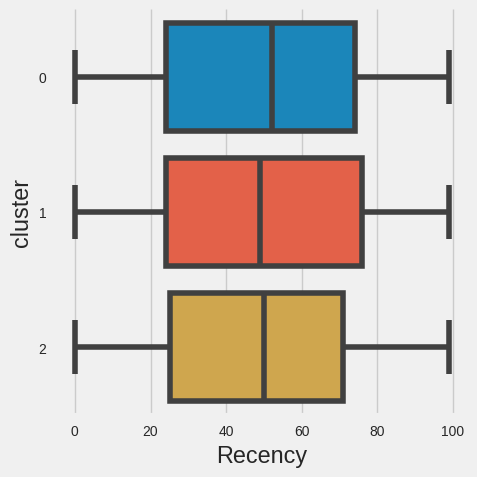

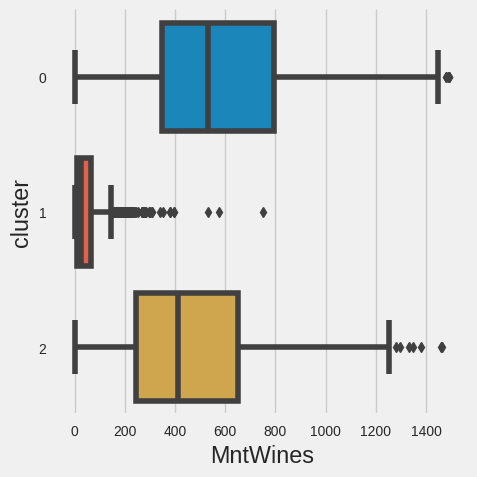

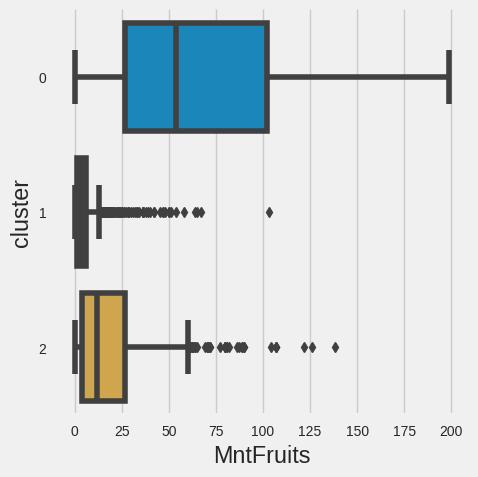

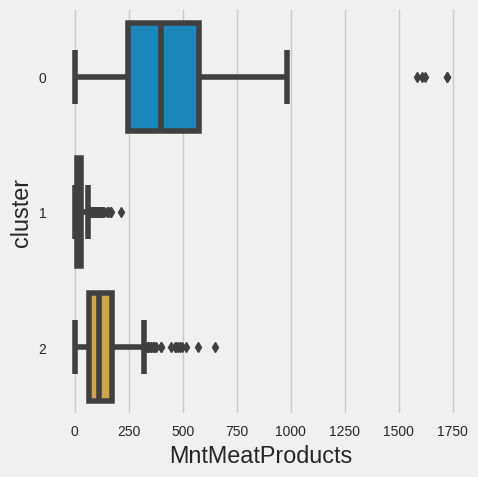

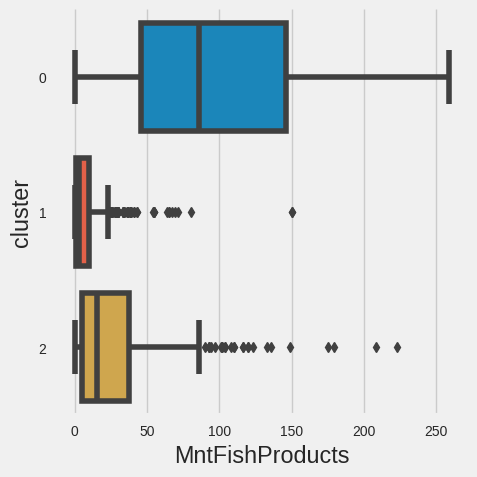

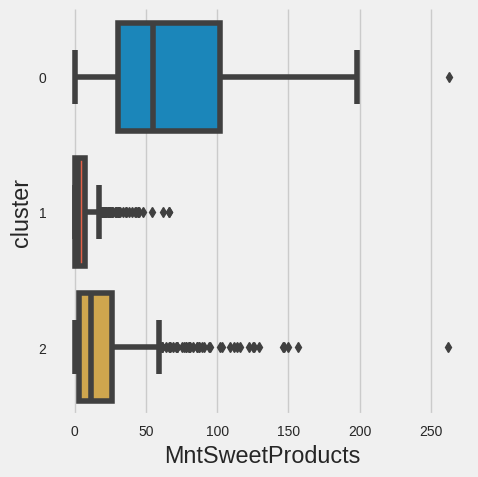

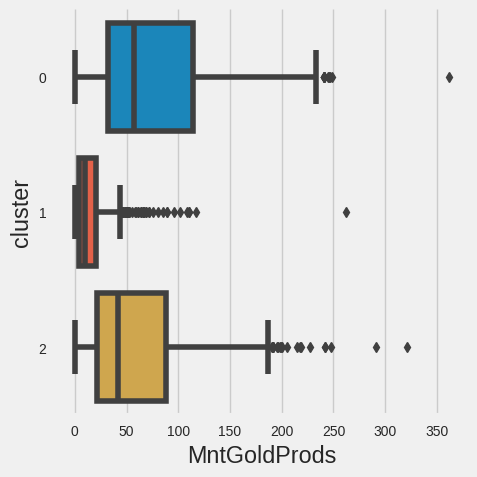

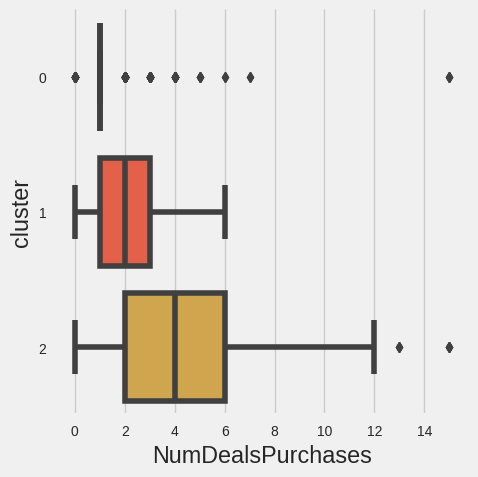

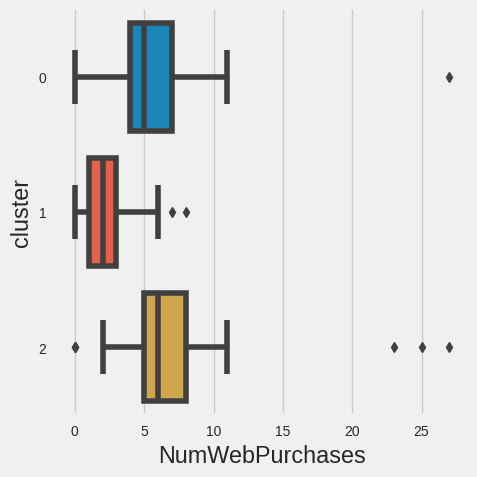

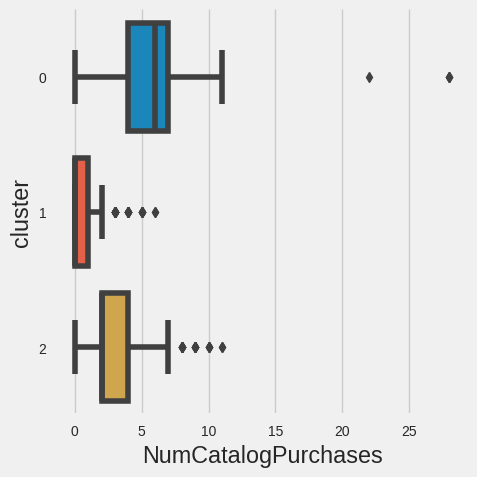

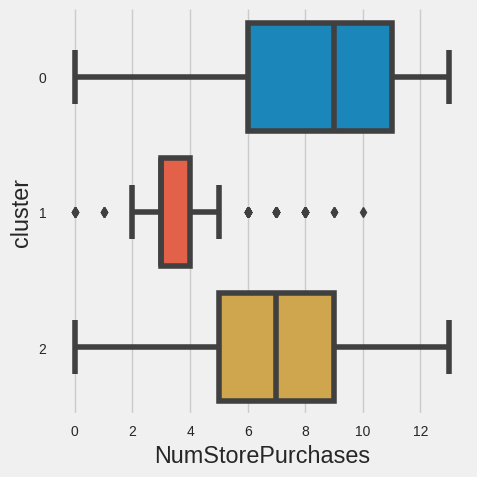

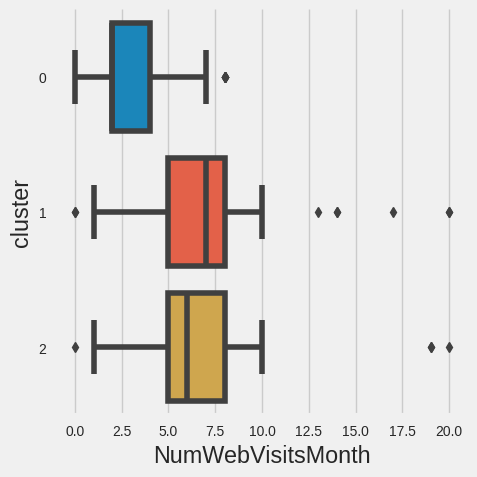

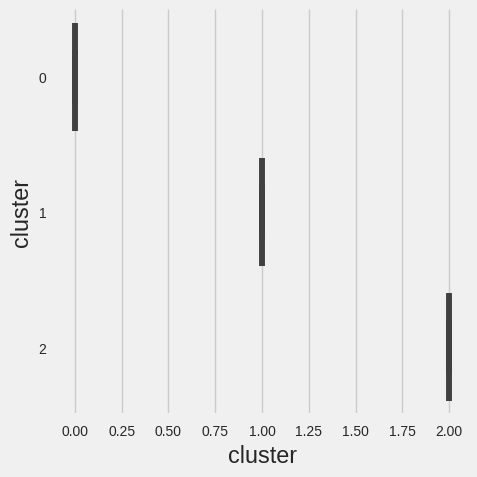

In [49]:
# Plot box-plot of each cluster for each column and write a complete observation over each clusters and indicate special characteristics of each cluster
for i in df[:].columns:
    sns.catplot(data = df, x=i, y='cluster', kind="box", orient = 'h')
    plt.show()


<AxesSubplot:xlabel='0', ylabel='1'>

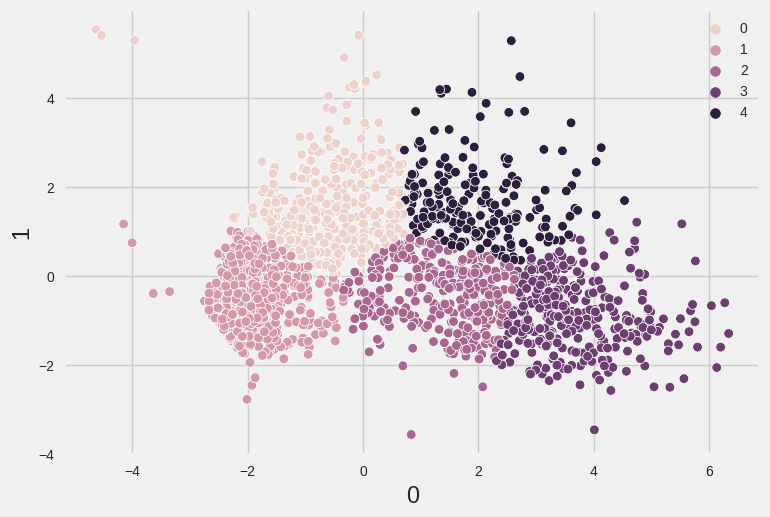

In [50]:
# Do tasks H, I and J for 5 clusters with random_state=0
kmeans = KMeans(n_clusters=5, random_state=1)
kmeans.fit(pca_data)
sns.scatterplot(x=pca_df.iloc[:,0], y=pca_df.iloc[:,1], hue=kmeans.labels_)

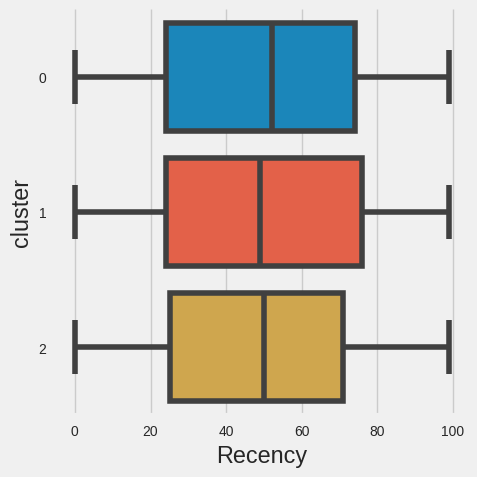

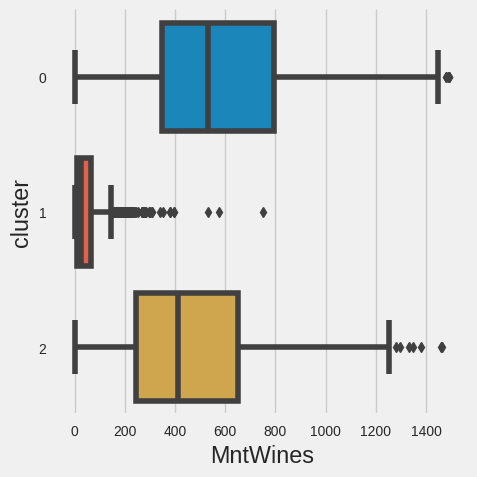

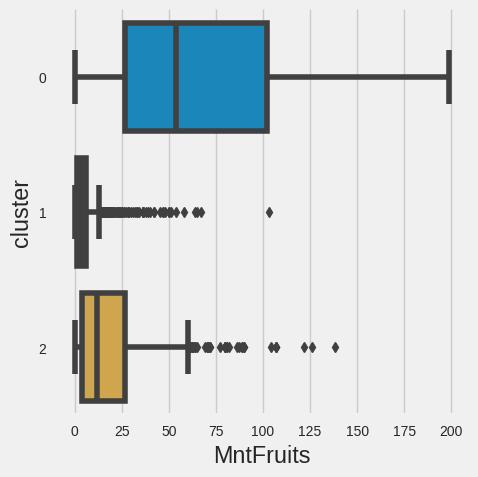

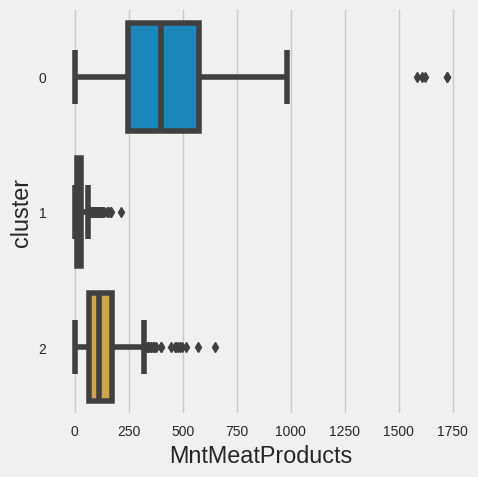

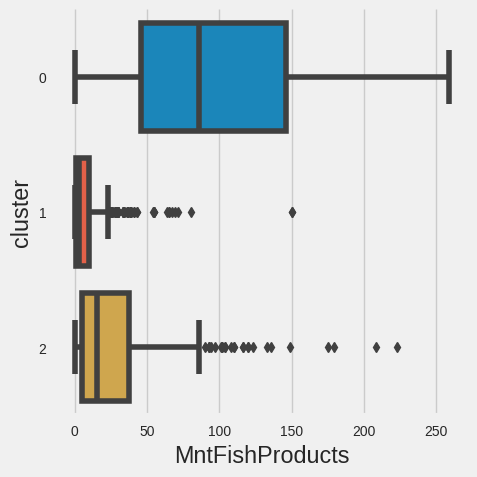

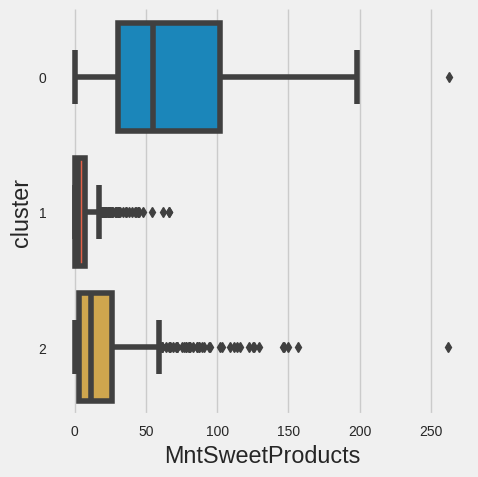

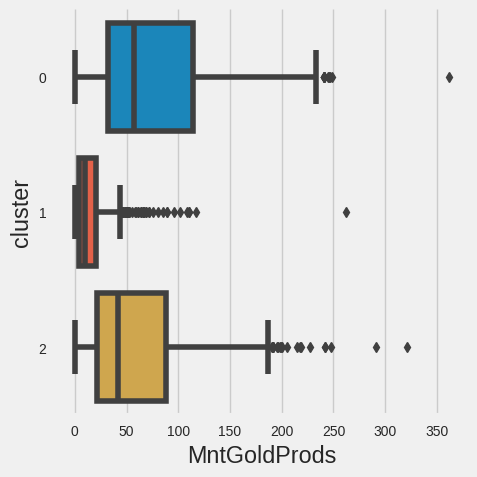

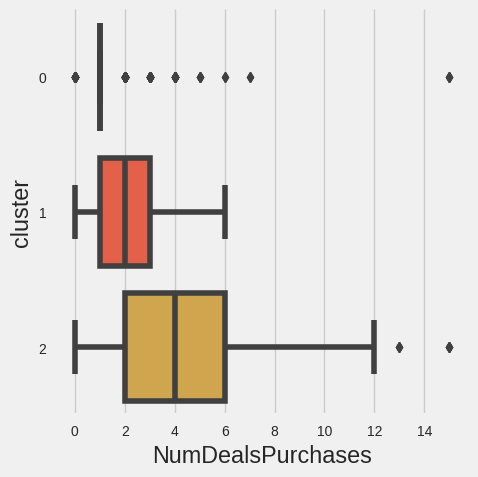

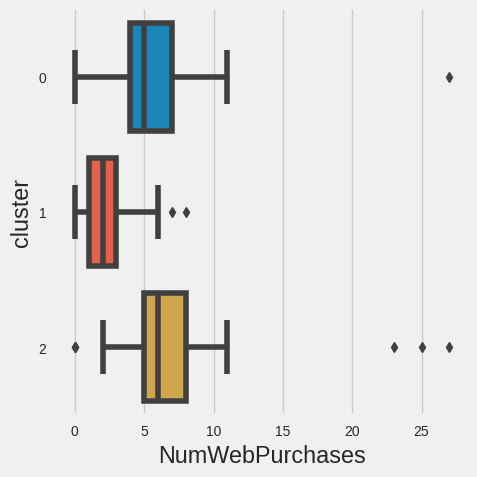

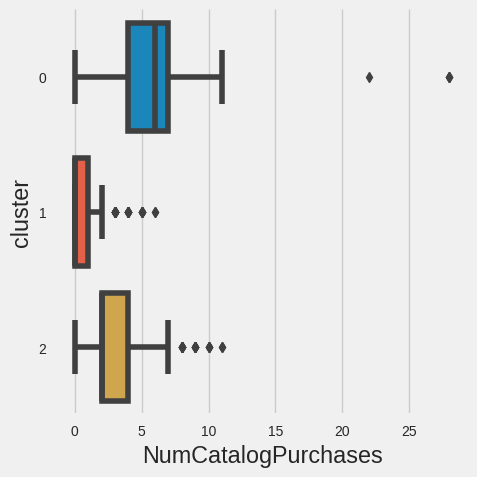

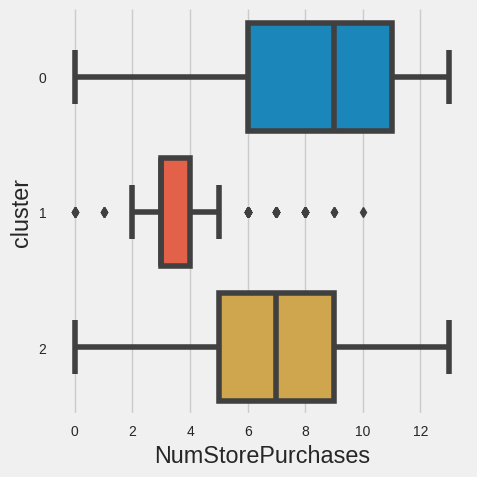

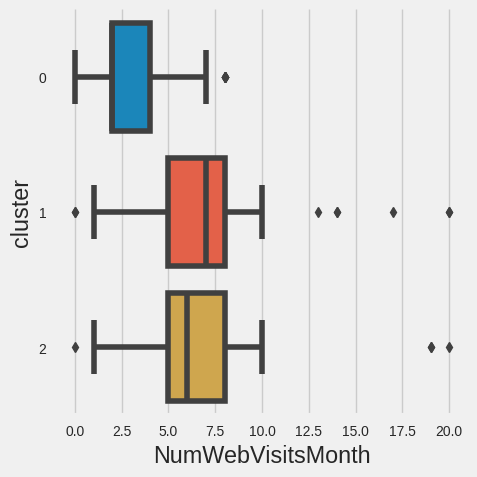

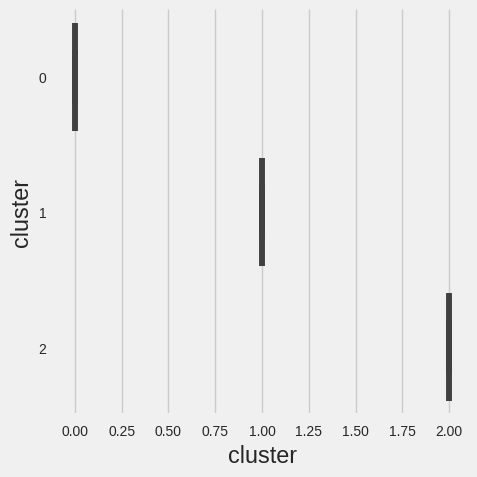

In [51]:
for col in df[:].columns:
    sns.catplot(data = df, x=col, y='cluster', kind="box", orient = 'h')
    plt.show()

<AxesSubplot:xlabel='0', ylabel='1'>

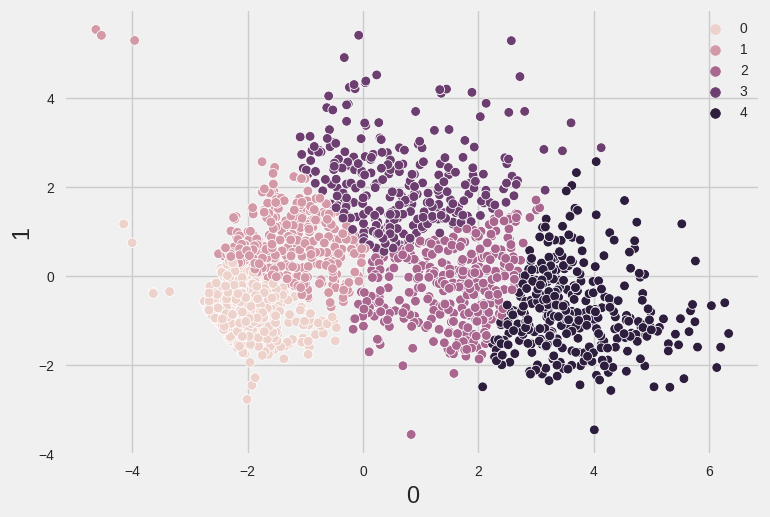

In [58]:
# Now use K-Medoids method with number of clusters=5 and 
kmedoids = KMedoids(n_clusters=5, random_state=1)
kmedoids.fit(pca_data)
sns.scatterplot(x=pca_df.iloc[:,0], y=pca_df.iloc[:,1], hue=kmedoids.labels_)

/home/sarasadatnasr/.local/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


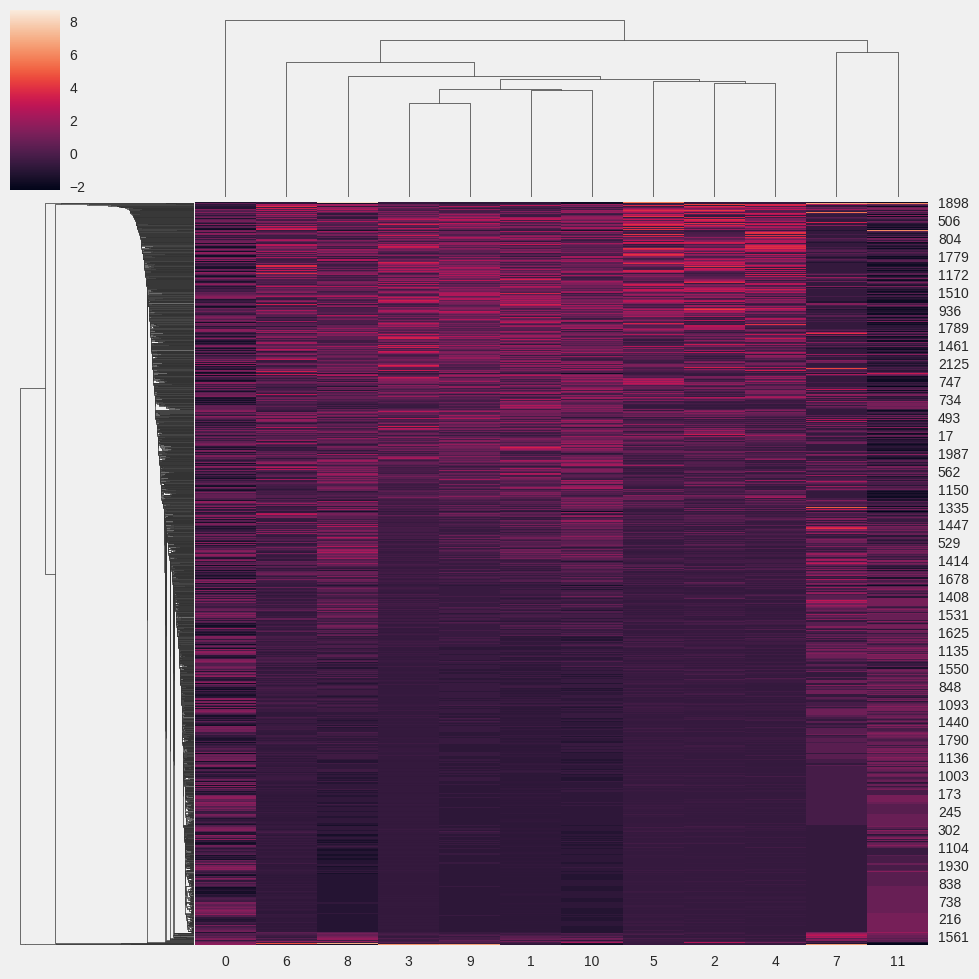

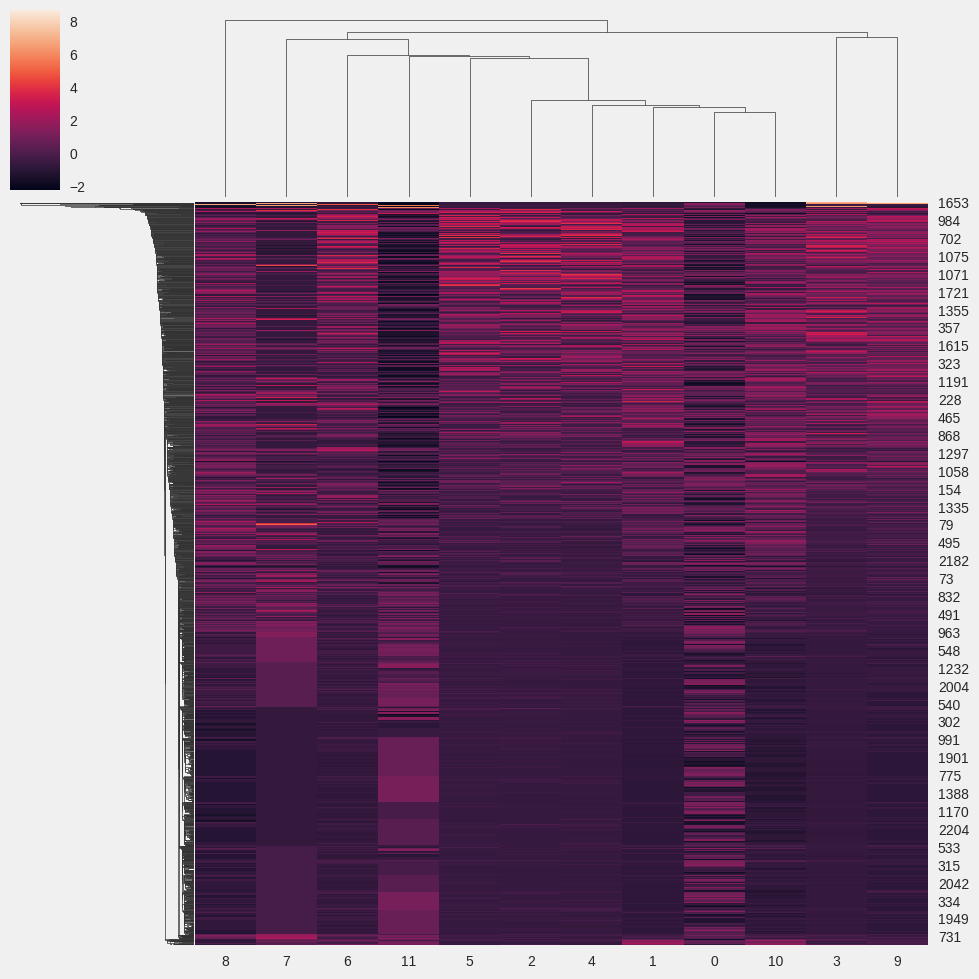

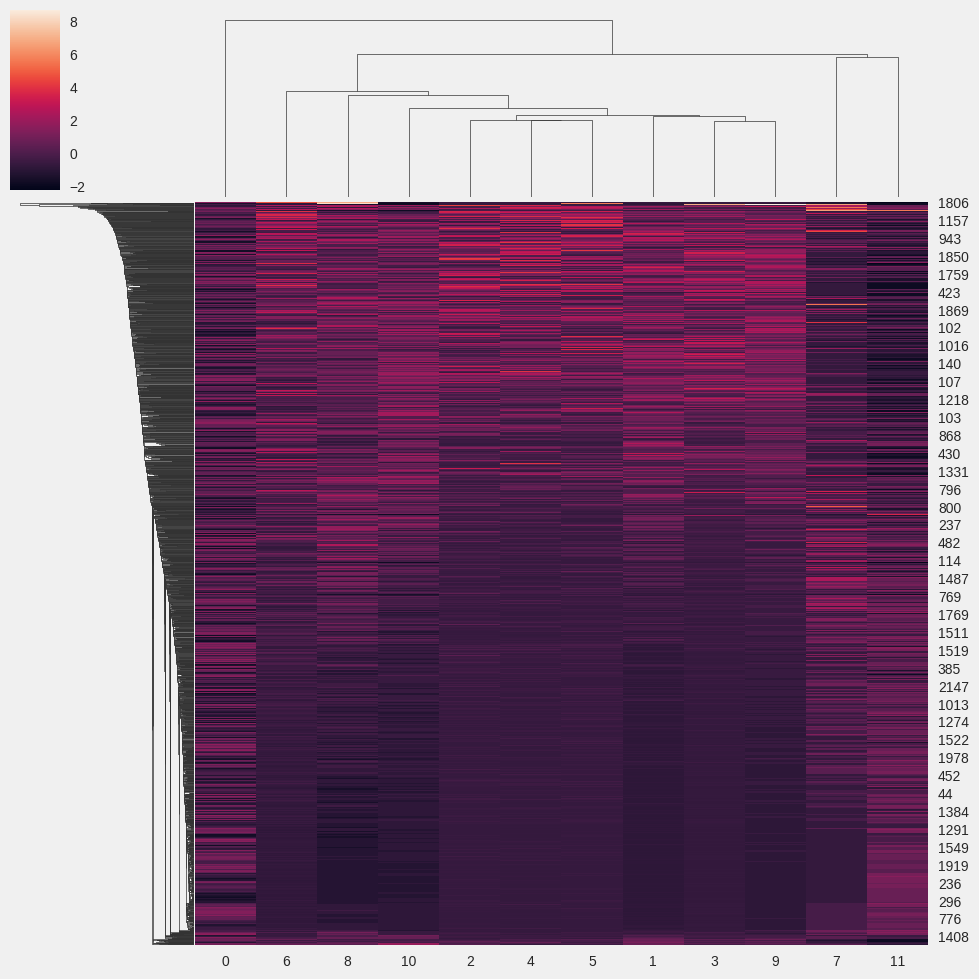

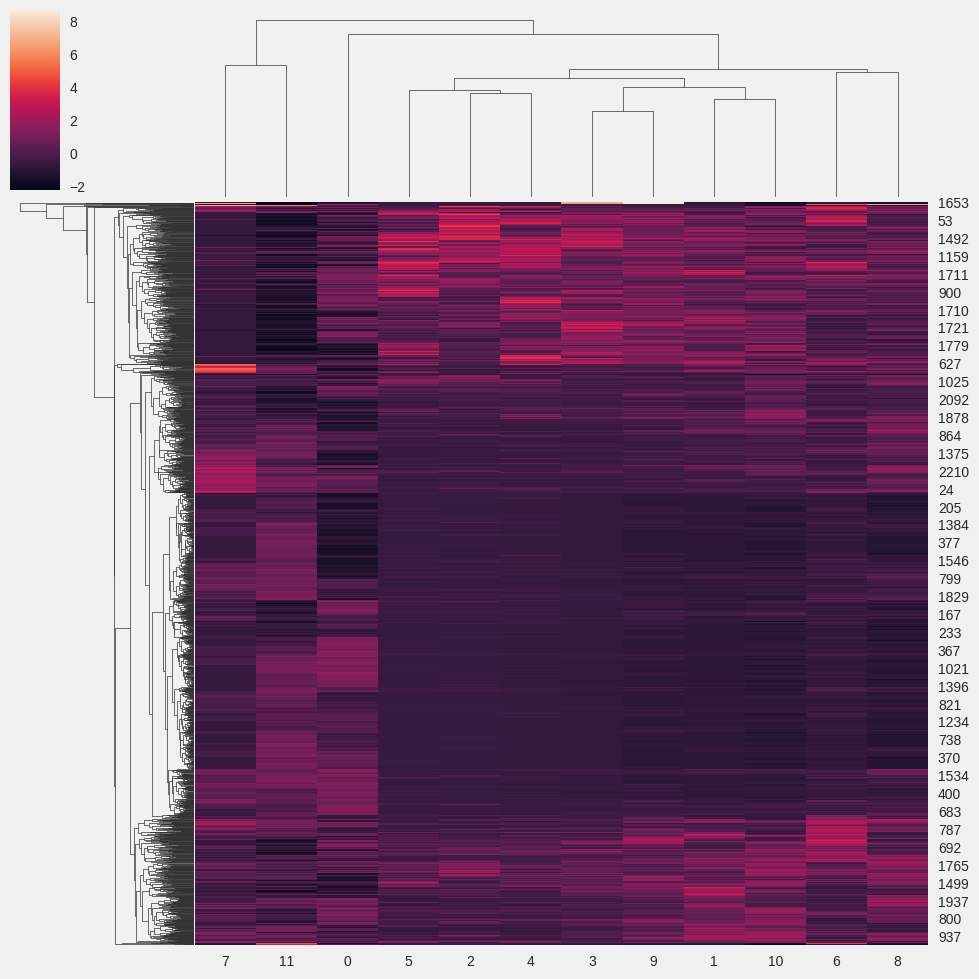

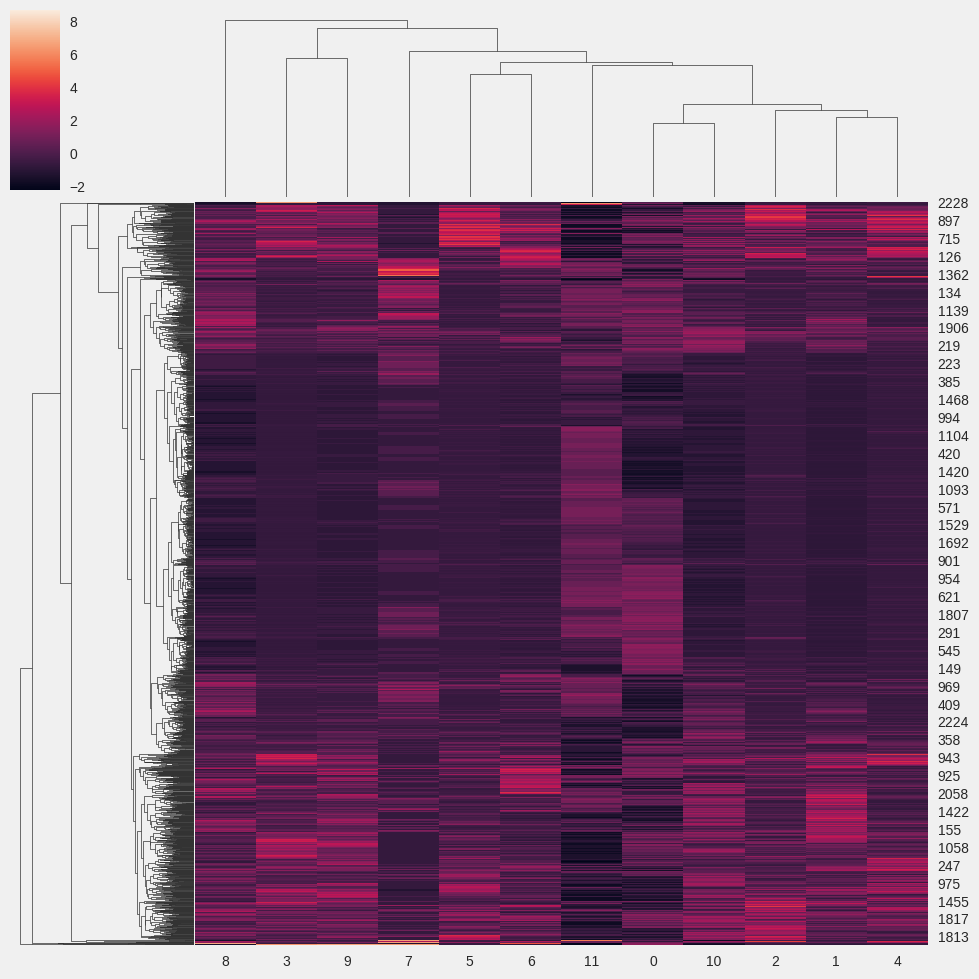

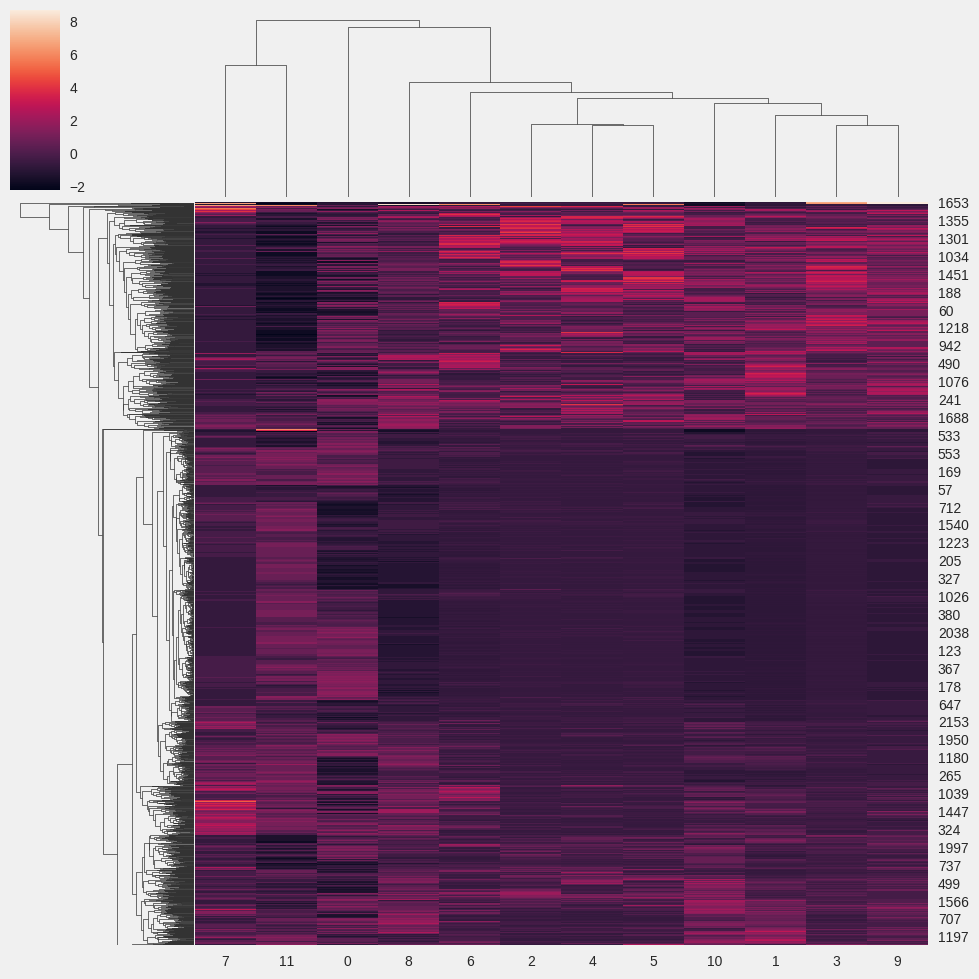

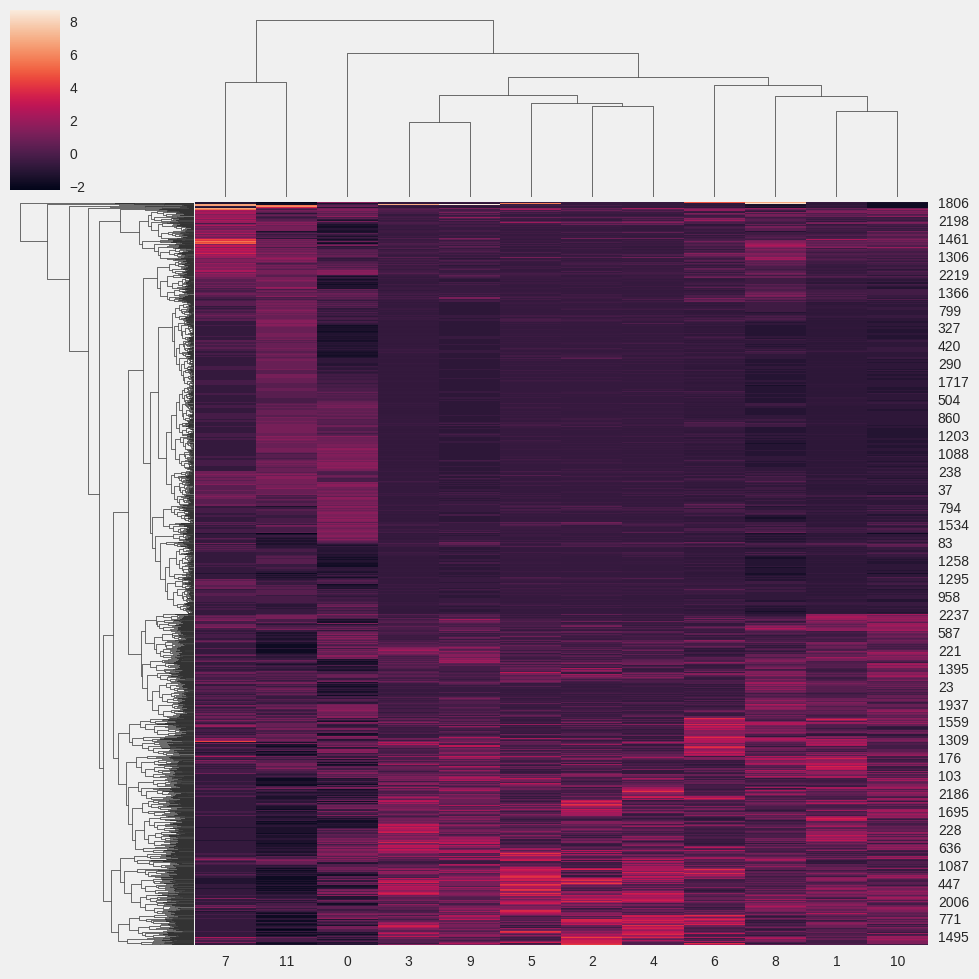

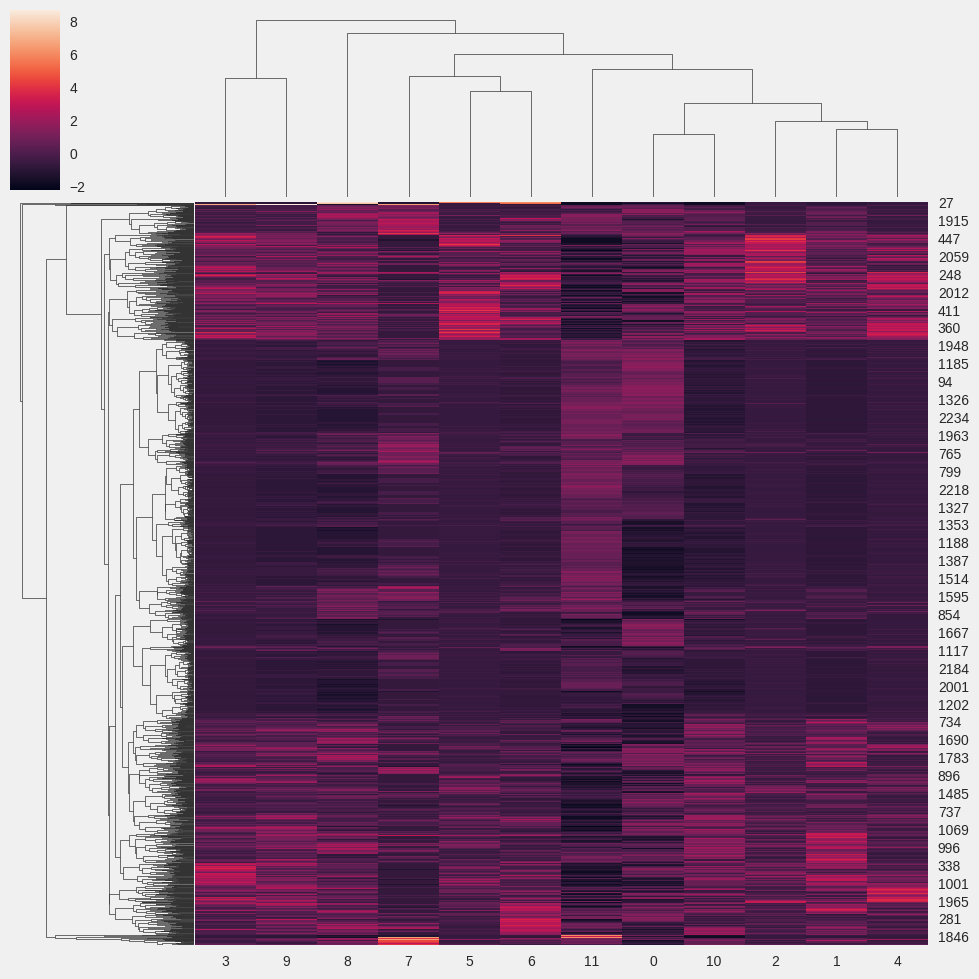

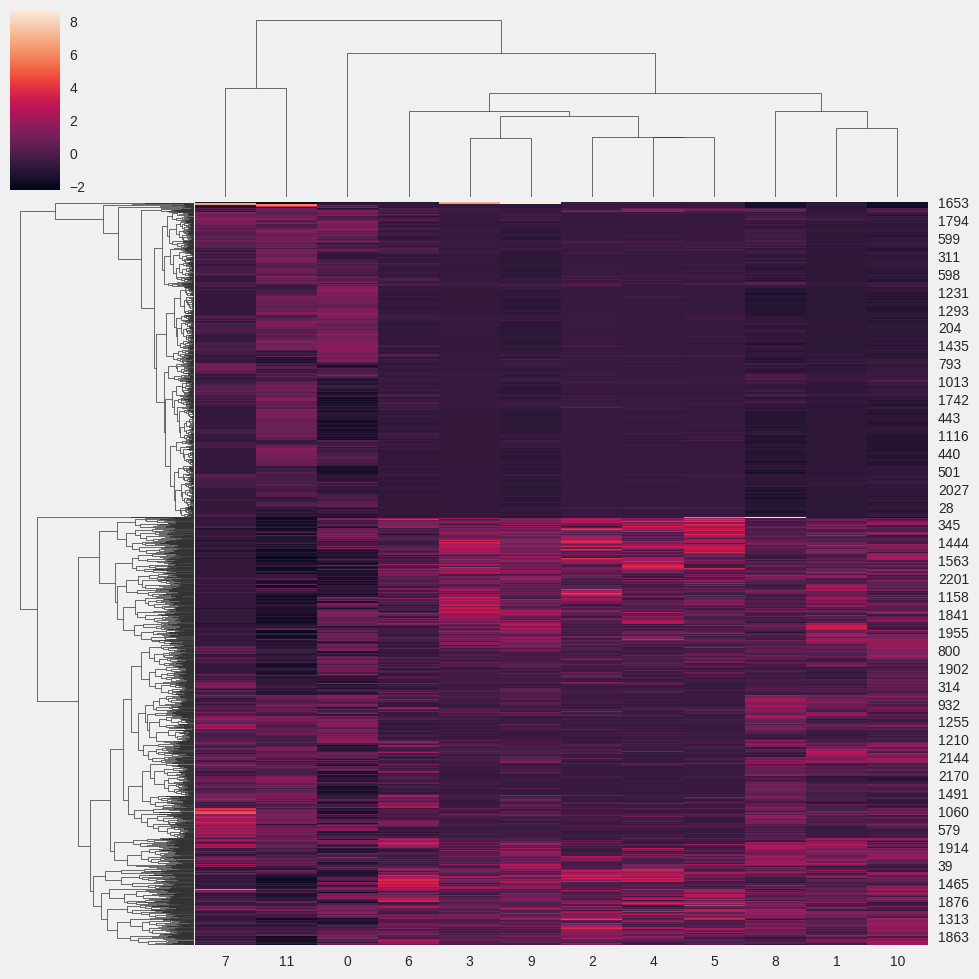

In [60]:
# Draw dendrogram of data with single, complete 
scaled_df = pd.DataFrame(scaled_data)
for linkage in ['single', 'average', 'complete']:
    for meter in ['euclidean', 'chebyshev', 'cityblock']:
        sns.clustermap(scaled_df, method=linkage, metric=meter)
        plt.show()

<AxesSubplot:>

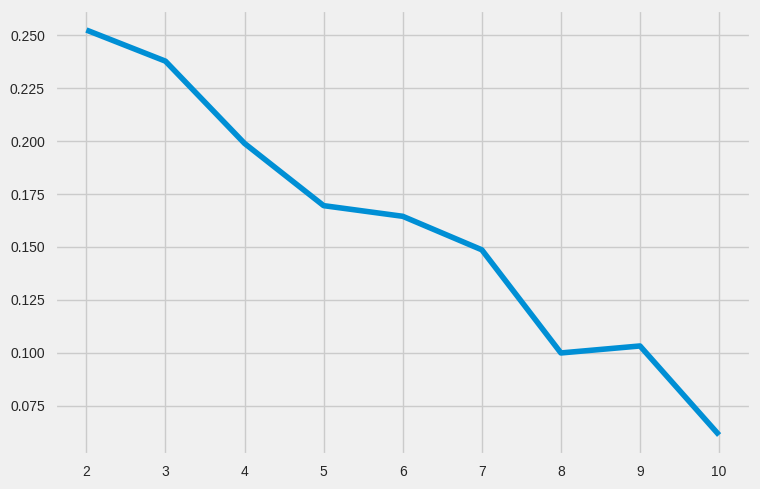

In [63]:
# Cluster data and data_pca with DBSCAN and Gaussian Mixture Model methods with optimized parameters and repeat tasks H, I and J
silhouette = []
for i in range(2,11):
    gmm = GaussianMixture(n_components=i)
    gmm.fit(pca_data)
    gmm_labels = gmm.predict(pca_data)
    silhouette.append(silhouette_score(scaled_data,gmm_labels))
sns.lineplot(x = np.linspace(2,10,9), y = silhouette)

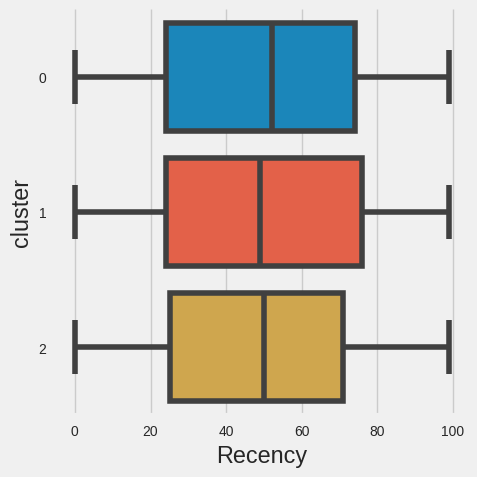

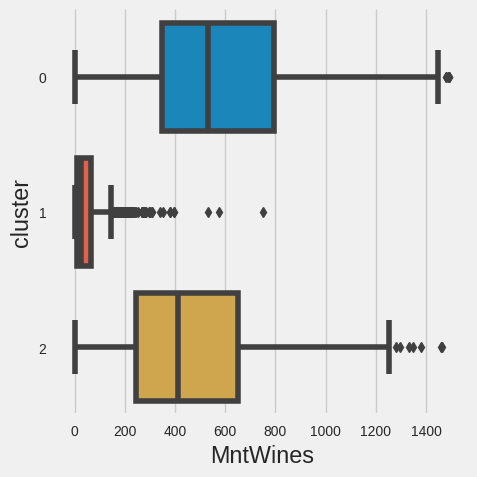

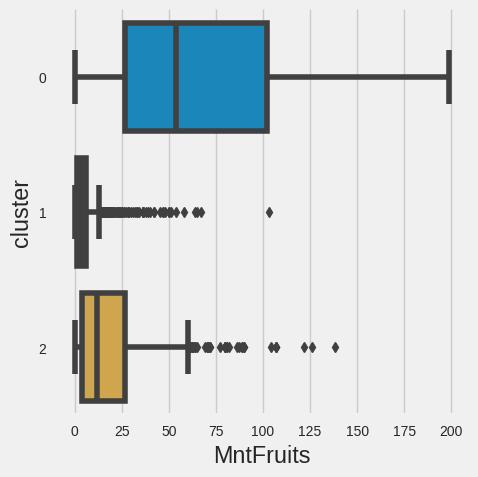

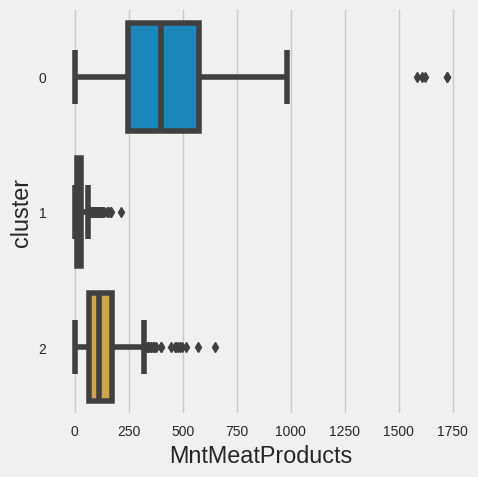

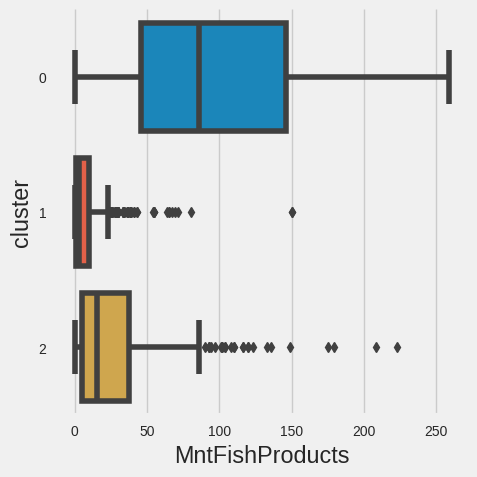

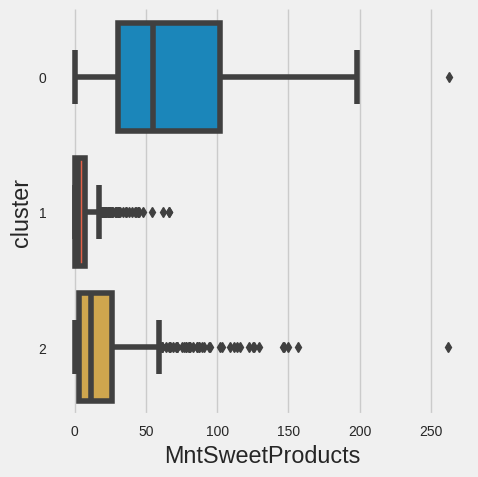

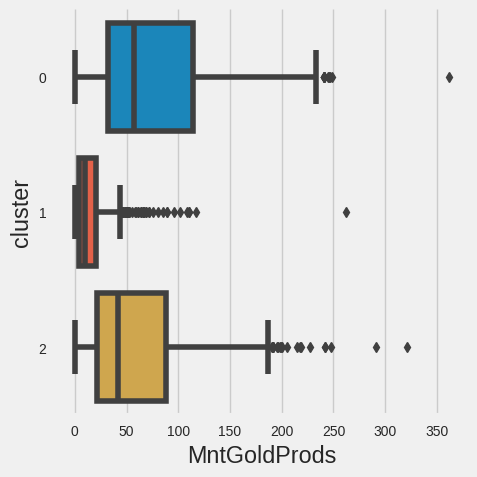

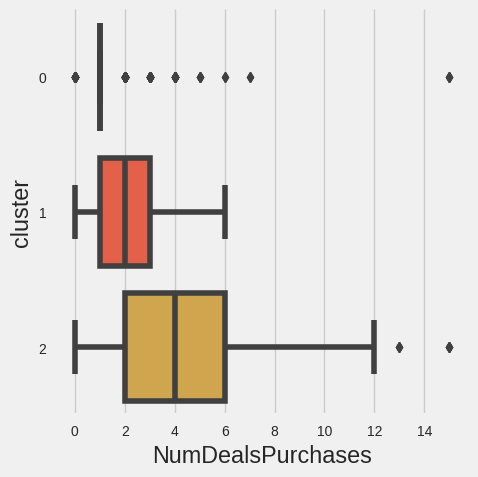

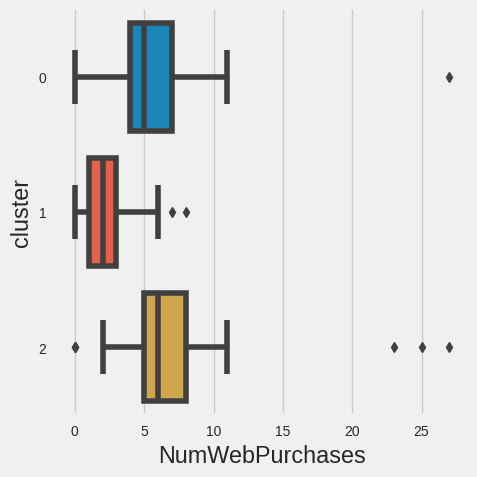

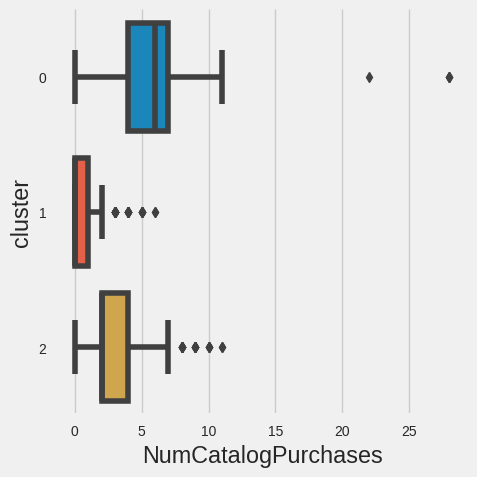

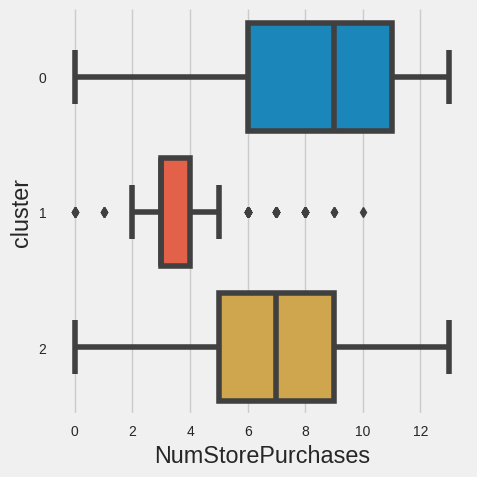

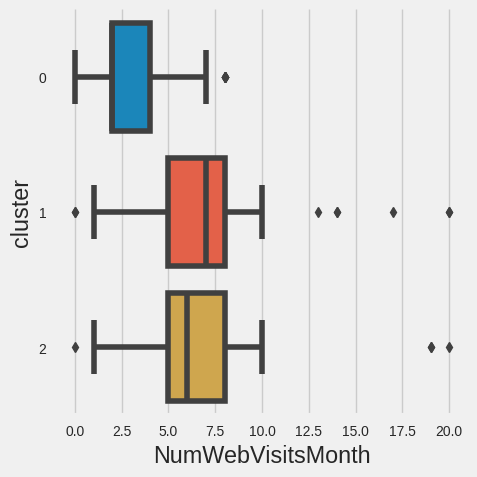

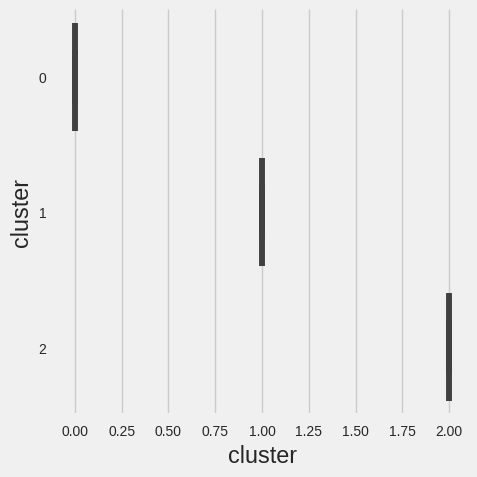

In [64]:
for i in df[:].columns:
    sns.catplot(data = df, x=i, y='cluster', kind="box", orient = 'h')
    plt.show()